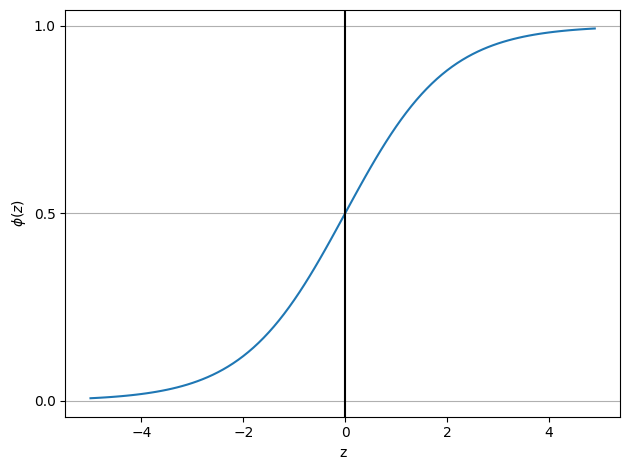

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
#
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Creating sample Z points
#
z = np.arange(-5, 5, 0.1)

# Invoking Sigmoid function on all Z points
#
phi_z = sigmoid(z)

# Plotting the Sigmoid function
#
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

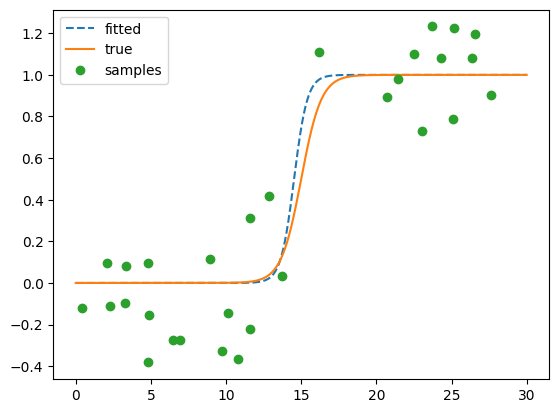

In [3]:
from scipy.optimize import curve_fit

def sigmoid(x, k, x0):
    return 1.0 / (1 + np.exp(-k * (x - x0)))

n_samples = 1000
true_x0 = 15
true_k = 1.5
sigma = 0.2

x = np.linspace(0, 30, num=n_samples)
y = sigmoid(x, k=true_k, x0=true_x0)
y_with_noise = y + sigma * np.random.randn(n_samples)

some_points = np.random.choice(1000, size=30)  # Erstellt 30 Datenpunkte
xdata = x[some_points]
ydata = y_with_noise[some_points]

# Die Kurve fitten
popt, pcov = curve_fit(sigmoid, xdata, ydata)
estimated_k, estimated_x0 = popt

# Die Fitted Kurve plotten
y_fitted = sigmoid(x, k=estimated_k, x0=estimated_x0)

# Alles plotten
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y_fitted, '--', label='fitted')
ax.plot(x, y, '-', label='true')
ax.plot(xdata, ydata, 'o', label='samples')

ax.legend()